In [1]:
# Í∏∞Î≥∏ ÎùºÏù¥Î∏åÎü¨Î¶¨
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Í∑∏ÎûòÌîÑ Í∏∞Î≥∏ ÌÖåÎßà ÏÑ§Ï†ï
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# Í∑∏ÎûòÌîÑ Í∏∞Î≥∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 10, 5
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# Î≥µÏû°Ìïú ÌÜµÍ≥Ñ Ï≤òÎ¶¨Î•º ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
from scipy import stats

## Ï≤´ Ï∑®ÏóÖ ÏÜåÏöîÍ∏∞Í∞Ñ(Ï§ÄÎπÑÍ∏∞Í∞Ñ) ÎπÑÏú®

In [2]:
# 1. ÏóëÏÖÄ ÌååÏùº Í≤ΩÎ°ú
file_path_duration = 'ÏÑ±Î≥Ñ_Ï≤´ Ï∑®ÏóÖ ÏÜåÏöîÍ∏∞Í∞Ñ Î∞è ÌèâÍ∑†ÏÜåÏöîÍ∏∞Í∞Ñ(15 ~ 24ÎÖÑ).xlsx'


In [3]:
# 2. ÌååÏùºÏùÑ header ÏóÜÏù¥ Î∂àÎü¨Ïò§Í∏∞ (Î≥ëÌï© ÏÖÄ Íµ¨Ï°∞ ÎåÄÏùë)
df_duration_raw = pd.read_excel(file_path_duration, sheet_name='Îç∞Ïù¥ÌÑ∞', header=None)

C:\Users\samsung\anaconda\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
# 3. 1Ìñâ + 2ÌñâÏùÑ Ï°∞Ìï©ÌïòÏó¨ Ïó¥ Ïù¥Î¶Ñ ÎßåÎì§Í∏∞
duration_header = df_duration_raw.iloc[0].astype(str) + '_' + df_duration_raw.iloc[1].astype(str)
duration_header.iloc[0] = 'Ïó∞Î†πÍµ¨Î∂Ñ'
duration_header.iloc[1] = 'ÏÑ±Î≥Ñ'

In [5]:
# 4. 3ÌñâÎ∂ÄÌÑ∞ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Íµ¨ÏÑ±
df_duration = df_duration_raw[2:].copy()
df_duration.columns = duration_header
df_duration.reset_index(drop=True, inplace=True)

In [6]:
# 5. '15~29ÏÑ∏ Ï†ÑÏ≤¥' Ìñâ ÌïÑÌÑ∞ÎßÅ
df_duration_youth_total = df_duration[
    (df_duration['Ïó∞Î†πÍµ¨Î∂Ñ'] == '15~29ÏÑ∏') & (df_duration['ÏÑ±Î≥Ñ'] == 'Ï†ÑÏ≤¥')
].copy()

In [7]:
# 6. Ïó∞ÎèÑ Î∞è Î∂ÑÏÑùÌï† ÏÜåÏöîÍ∏∞Í∞Ñ Íµ¨Í∞Ñ Ï†ïÏùò
duration_years = list(range(2017, 2025))
duration_labels = ['3Í∞úÏõî ÎØ∏Îßå', '3~6Í∞úÏõî ÎØ∏Îßå', '6Í∞úÏõî~1ÎÖÑ ÎØ∏Îßå',
                   '1~2ÎÖÑ ÎØ∏Îßå', '2~3ÎÖÑ ÎØ∏Îßå', '3ÎÖÑ Ïù¥ÏÉÅ']

In [8]:
# 7. Ïó∞ÎèÑÎ≥Ñ ÎπÑÏú® Í≥ÑÏÇ∞
duration_results = []

for year in duration_years:
    try:
        # ÏûÑÍ∏àÍ∑ºÎ°úÏûê Ïàò
        wage_col = f'{year}.05_ÏûÑÍ∏à Í∑ºÎ°úÏûê'
        wage_total = pd.to_numeric(df_duration_youth_total[wage_col].values[0], errors='coerce')

        if pd.isna(wage_total) or wage_total == 0:
            continue

        # Íµ¨Í∞ÑÎ≥Ñ Ïù∏Ïõê
        period_values = []
        for label in duration_labels:
            col_key = f'{year}.05_{label}'
            val = pd.to_numeric(df_duration_youth_total[col_key].values[0], errors='coerce')
            period_values.append(val)

        if any(pd.isna(val) for val in period_values):
            continue

        # ÎπÑÏú® Í≥ÑÏÇ∞
        period_percentages = [round(v / wage_total * 100, 2) for v in period_values]
        row = {'Ïó∞ÎèÑ': year, 'ÏûÑÍ∏àÍ∑ºÎ°úÏûêÏàò': int(wage_total)}
        for i, label in enumerate(duration_labels):
            row[label] = period_percentages[i]
        duration_results.append(row)
    except:
        continue

In [9]:
# 8. Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ± Î∞è ÏóëÏÖÄ Ï†ÄÏû•
df_duration_result = pd.DataFrame(duration_results)
print("ÏÜåÏöîÍ∏∞Í∞Ñ Î∂ÑÏÑù Í≤∞Í≥º:")
print(df_duration_result)


ÏÜåÏöîÍ∏∞Í∞Ñ Î∂ÑÏÑù Í≤∞Í≥º:
     Ïó∞ÎèÑ  ÏûÑÍ∏àÍ∑ºÎ°úÏûêÏàò  3Í∞úÏõî ÎØ∏Îßå  3~6Í∞úÏõî ÎØ∏Îßå  6Í∞úÏõî~1ÎÖÑ ÎØ∏Îßå  1~2ÎÖÑ ÎØ∏Îßå  2~3ÎÖÑ ÎØ∏Îßå  3ÎÖÑ Ïù¥ÏÉÅ
0  2017    4012   50.00     13.51       8.77    11.59     6.43   9.70
1  2018    4054   49.61     12.01      10.80    11.54     6.96   9.08
2  2019    4070   49.51     12.83       9.95    11.70     6.54   9.51
3  2020    3963   49.21     13.42      11.33    11.88     6.33   7.80
4  2021    3953   47.41     14.07      11.89    11.74     6.75   8.17
5  2022    4018   48.95     12.00      10.18    13.14     6.84   8.91
6  2023    3865   48.90     11.82      10.87    13.12     6.91   8.38
7  2024    3671   47.67     11.22      11.06    13.38     6.95   9.72


## Ìá¥ÏÇ¨Ïú® Î∂ÑÏÑù

In [10]:
# 1. ÏóëÏÖÄ ÌååÏùº Í≤ΩÎ°ú
file_path_econ = 'Ïó∞Î†πÎ≥Ñ Í≤ΩÏ†úÌôúÎèô ÏÉÅÌÉú (2).xlsx'

In [11]:
# 2. ÏóëÏÖÄ ÌååÏùºÏóêÏÑú 'Îç∞Ïù¥ÌÑ∞' ÏãúÌä∏ Î∂àÎü¨Ïò§Í∏∞
df_econ = pd.read_excel(file_path_econ, sheet_name='Îç∞Ïù¥ÌÑ∞')

C:\Users\samsung\anaconda\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [12]:
# 3. 'Ïó∞Î†πÎ≥Ñ'Ïù¥ '* 15~29ÏÑ∏'Ïù¥Í≥† 'ÏàòÌïôÏó¨Î∂Ä'Í∞Ä 'Ï†ÑÏ≤¥'Ïù∏ Ìñâ ÌïÑÌÑ∞ÎßÅ
df_econ_target = df_econ[(df_econ['Ïó∞Î†πÎ≥Ñ'] == '* 15~29ÏÑ∏') & (df_econ['ÏàòÌïôÏó¨Î∂Ä'] == 'Ï†ÑÏ≤¥')].copy()


In [13]:
# 4. Î∂ÑÏÑù ÎåÄÏÉÅ Ïó∞ÎèÑ
econ_years = list(range(2017, 2025))

In [14]:
# 5. Ïã§ÏóÖÎ•† Í≥ÑÏÇ∞
econ_results = []
for year in econ_years:
    try:
        econ_pop = pd.to_numeric(df_econ_target[f'{year}.05.1'].values[0], errors='coerce')  # Í≤ΩÏ†úÌôúÎèôÏù∏Íµ¨
        unemployed = pd.to_numeric(df_econ_target[f'{year}.05.3'].values[0], errors='coerce')  # Ïã§ÏóÖÏûê

        if pd.isna(econ_pop) or econ_pop == 0 or pd.isna(unemployed):
            continue

        rate = round(unemployed / econ_pop * 100, 2)
        econ_results.append({
            'Ïó∞ÎèÑ': year,
            'Í≤ΩÏ†úÌôúÎèôÏù∏Íµ¨': int(econ_pop),
            'Ïã§ÏóÖÏûê': int(unemployed),
            'Ìá¥ÏÇ¨Ïú®': rate
        })
    except:
        continue


In [15]:
# 6. Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ÄÏû• Î∞è Ï∂úÎ†•
df_econ_result = pd.DataFrame(econ_results)
print("\nÍ≤ΩÏ†úÌôúÎèô ÏÉÅÌÉú Î∂ÑÏÑù Í≤∞Í≥º:")
print(df_econ_result)


Í≤ΩÏ†úÌôúÎèô ÏÉÅÌÉú Î∂ÑÏÑù Í≤∞Í≥º:
     Ïó∞ÎèÑ  Í≤ΩÏ†úÌôúÎèôÏù∏Íµ¨  Ïã§ÏóÖÏûê    Ìá¥ÏÇ¨Ïú®
0  2017    4410  408   9.25
1  2018    4368  460  10.53
2  2019    4390  437   9.95
3  2020    4196  426  10.15
4  2021    4310  402   9.33
5  2022    4425  320   7.23
6  2023    4252  247   5.81
7  2024    4107  276   6.72


## ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù

In [16]:
# 1. Ïó∞ÎèÑ Í∏∞Ï§ÄÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ëÌï©
df_corr = pd.merge(
    df_duration_result[['Ïó∞ÎèÑ', '3Í∞úÏõî ÎØ∏Îßå']],
    df_econ_result[['Ïó∞ÎèÑ', 'Ìá¥ÏÇ¨Ïú®']],
    on='Ïó∞ÎèÑ',
    how='inner'
)

In [17]:
# 2. ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞ (ÌîºÏñ¥Ïä®)
correlation = df_corr['3Í∞úÏõî ÎØ∏Îßå'].corr(df_corr['Ìá¥ÏÇ¨Ïú®'])

In [18]:
# 3. Í≤∞Í≥º Ï∂úÎ†•
print("\n[ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù Í≤∞Í≥º]")
print(df_corr)
print(f"\n'3Í∞úÏõî ÎØ∏Îßå' ÏÜåÏöîÍ∏∞Í∞Ñ ÎπÑÏú®Í≥º Ïã§ÏóÖÎ•†Í∞ÑÏùò ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: {round(correlation, 3)}")



[ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù Í≤∞Í≥º]
     Ïó∞ÎèÑ  3Í∞úÏõî ÎØ∏Îßå    Ìá¥ÏÇ¨Ïú®
0  2017   50.00   9.25
1  2018   49.61  10.53
2  2019   49.51   9.95
3  2020   49.21  10.15
4  2021   47.41   9.33
5  2022   48.95   7.23
6  2023   48.90   5.81
7  2024   47.67   6.72

'3Í∞úÏõî ÎØ∏Îßå' ÏÜåÏöîÍ∏∞Í∞Ñ ÎπÑÏú®Í≥º Ïã§ÏóÖÎ•†Í∞ÑÏùò ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.397


## ÏãúÍ∞ÅÌôî

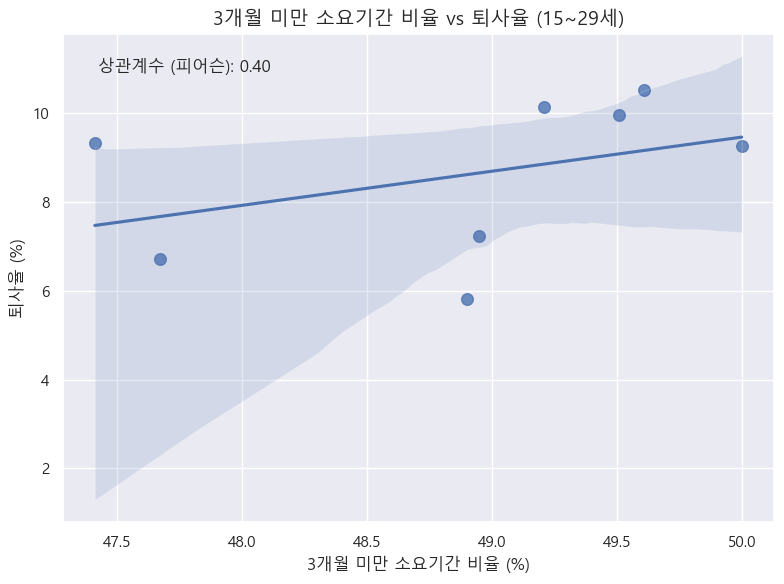

In [19]:
# 1. ÏÇ∞Ï†êÎèÑ + ÌöåÍ∑ÄÏÑ†
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_corr,
    x='3Í∞úÏõî ÎØ∏Îßå',
    y='Ìá¥ÏÇ¨Ïú®',
    ci=95,  # Ïã†Î¢∞Íµ¨Í∞Ñ ÌëúÏãú Ï†úÍ±∞
    scatter_kws={'s': 70}
)

# 2. Ï†úÎ™© Î∞è Ï∂ï ÎùºÎ≤®
plt.title("3Í∞úÏõî ÎØ∏Îßå ÏÜåÏöîÍ∏∞Í∞Ñ ÎπÑÏú® vs Ìá¥ÏÇ¨Ïú® (15~29ÏÑ∏)", fontsize=14)
plt.xlabel("3Í∞úÏõî ÎØ∏Îßå ÏÜåÏöîÍ∏∞Í∞Ñ ÎπÑÏú® (%)", fontsize=12)
plt.ylabel("Ìá¥ÏÇ¨Ïú® (%)", fontsize=12)

# 3. ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌëúÏãú
plt.text(
    0.05, 0.95,
    f"ÏÉÅÍ¥ÄÍ≥ÑÏàò (ÌîºÏñ¥Ïä®): {correlation:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top'
)

plt.tight_layout()
plt.show()

## 6Í∞úÏõî ÎØ∏Îßå

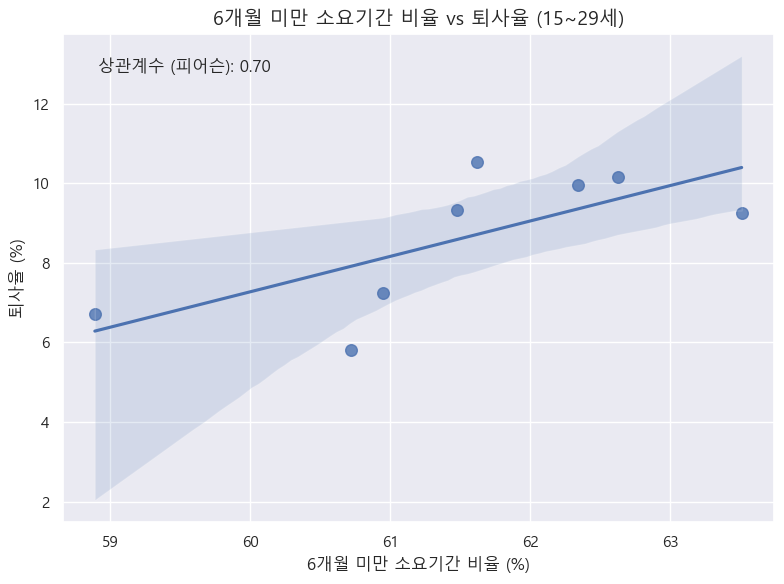

In [20]:
# 6Í∞úÏõî ÎØ∏Îßå ÏÜåÏöîÍ∏∞Í∞Ñ ÎπÑÏú® Í≥ÑÏÇ∞
df_duration_result['6Í∞úÏõî ÎØ∏Îßå'] = (
    pd.to_numeric(df_duration_result['3Í∞úÏõî ÎØ∏Îßå'], errors='coerce') +
    pd.to_numeric(df_duration_result['3~6Í∞úÏõî ÎØ∏Îßå'], errors='coerce')
)

# Ïã§ÏóÖÎ•† Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
df_econ_result['Ìá¥ÏÇ¨Ïú®'] = pd.to_numeric(df_econ_result['Ìá¥ÏÇ¨Ïú®'], errors='coerce')

# Îëê Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
df_corr_6mo = pd.merge(
    df_duration_result[['Ïó∞ÎèÑ', '6Í∞úÏõî ÎØ∏Îßå']],
    df_econ_result[['Ïó∞ÎèÑ', 'Ìá¥ÏÇ¨Ïú®']],
    on='Ïó∞ÎèÑ',
    how='inner'
).dropna()

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation_6mo = df_corr_6mo['6Í∞úÏõî ÎØ∏Îßå'].corr(df_corr_6mo['Ìá¥ÏÇ¨Ïú®'])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_corr_6mo,
    x='6Í∞úÏõî ÎØ∏Îßå',
    y='Ìá¥ÏÇ¨Ïú®',
    scatter_kws={'s': 70},
    ci=95
)

plt.title("6Í∞úÏõî ÎØ∏Îßå ÏÜåÏöîÍ∏∞Í∞Ñ ÎπÑÏú® vs Ìá¥ÏÇ¨Ïú® (15~29ÏÑ∏)", fontsize=14)
plt.xlabel("6Í∞úÏõî ÎØ∏Îßå ÏÜåÏöîÍ∏∞Í∞Ñ ÎπÑÏú® (%)", fontsize=12)
plt.ylabel("Ìá¥ÏÇ¨Ïú® (%)", fontsize=12)

# ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌëúÏãú
plt.text(
    0.05, 0.95,
    f"ÏÉÅÍ¥ÄÍ≥ÑÏàò (ÌîºÏñ¥Ïä®): {correlation_6mo:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top'
)

plt.tight_layout()
plt.show()

### 6Í∞úÏõî ÎØ∏Îßå ÏÜåÏöîÍ∏∞Í∞Ñ ÎπÑÏú® vs Ìá¥ÏÇ¨Ïú® ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≤∞Í≥º Î∂ÑÏÑù

- Ï°∏ÏóÖ ÌõÑ 6Í∞úÏõî Ïù¥ÎÇ¥Ïóê Ï∑®ÏóÖÌïú ÎπÑÏú®Í≥º Ìá¥ÏÇ¨Ïú® ÏÇ¨Ïù¥ÏóêÎäî Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ(r = 0.70) Í∞Ä Ï°¥Ïû¨ÌïúÎã§. 
- Ïù¥Îäî Ï°∞Í∏∞Ï∑®ÏóÖ ÎπÑÏú®Ïù¥ ÎÜíÏùÄ Ìï¥ÏùºÏàòÎ°ù Ìá¥ÏÇ¨Ïú®ÎèÑ ÎÜíÏïÑÏ°åÎã§Îäî Í≤ÉÏùÑ Î≥¥Ïó¨Ï§ÄÎã§.


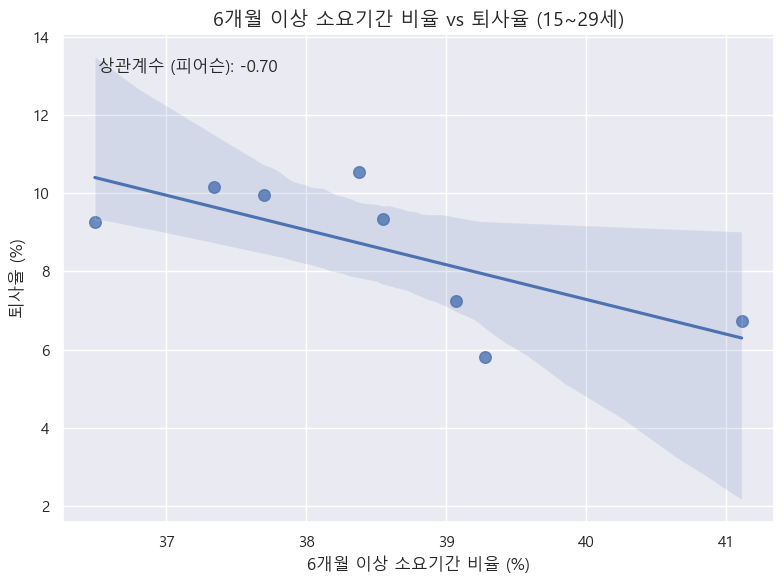

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 6Í∞úÏõî Ïù¥ÏÉÅ ÏÜåÏöî ÎπÑÏú® Í≥ÑÏÇ∞
df_duration_result['6Í∞úÏõî Ïù¥ÏÉÅ'] = (
    pd.to_numeric(df_duration_result['6Í∞úÏõî~1ÎÖÑ ÎØ∏Îßå'], errors='coerce') +
    pd.to_numeric(df_duration_result['1~2ÎÖÑ ÎØ∏Îßå'], errors='coerce') +
    pd.to_numeric(df_duration_result['2~3ÎÖÑ ÎØ∏Îßå'], errors='coerce') +
    pd.to_numeric(df_duration_result['3ÎÖÑ Ïù¥ÏÉÅ'], errors='coerce')
)

# Ìá¥ÏÇ¨Ïú® Ïà´ÏûêÌòï Î≥ÄÌôò
df_econ_result['Ìá¥ÏÇ¨Î•†'] = pd.to_numeric(df_econ_result['Ìá¥ÏÇ¨Ïú®'], errors='coerce')  # ÎòêÎäî 'Ìá¥ÏÇ¨Ïú®' Ïó¥Ïù¥ ÏûàÎã§Î©¥ Í∑∏Í±∏Î°ú ÍµêÏ≤¥

# Î≥ëÌï©
df_corr_6mo_plus = pd.merge(
    df_duration_result[['Ïó∞ÎèÑ', '6Í∞úÏõî Ïù¥ÏÉÅ']],
    df_econ_result[['Ïó∞ÎèÑ', 'Ìá¥ÏÇ¨Ïú®']],  # ÎòêÎäî 'Ìá¥ÏÇ¨Ïú®' Ïó¥
    on='Ïó∞ÎèÑ',
    how='inner'
).dropna()

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation_6mo_plus = df_corr_6mo_plus['6Í∞úÏõî Ïù¥ÏÉÅ'].corr(df_corr_6mo_plus['Ìá¥ÏÇ¨Ïú®'])  # ÎòêÎäî 'Ìá¥ÏÇ¨Ïú®'

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_corr_6mo_plus,
    x='6Í∞úÏõî Ïù¥ÏÉÅ',
    y='Ìá¥ÏÇ¨Ïú®',  # ÎòêÎäî 'Ìá¥ÏÇ¨Ïú®'
    scatter_kws={'s': 70},
    ci=95
)

plt.title("6Í∞úÏõî Ïù¥ÏÉÅ ÏÜåÏöîÍ∏∞Í∞Ñ ÎπÑÏú® vs Ìá¥ÏÇ¨Ïú® (15~29ÏÑ∏)", fontsize=14)
plt.xlabel("6Í∞úÏõî Ïù¥ÏÉÅ ÏÜåÏöîÍ∏∞Í∞Ñ ÎπÑÏú® (%)", fontsize=12)
plt.ylabel("Ìá¥ÏÇ¨Ïú® (%)", fontsize=12)

plt.text(
    0.05, 0.95,
    f"ÏÉÅÍ¥ÄÍ≥ÑÏàò (ÌîºÏñ¥Ïä®): {correlation_6mo_plus:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top'
)

plt.tight_layout()
plt.show()


### 6Í∞úÏõî Ïù¥ÏÉÅ ÏÜåÏöîÍ∏∞Í∞Ñ ÎπÑÏú® vs Ìá¥ÏÇ¨Ïú® ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≤∞Í≥º Î∂ÑÏÑù

- 6Í∞úÏõî Ïù¥ÏÉÅ ÏÜåÏöîÎêú Ï∑®ÏóÖÏûêÏùò ÎπÑÏú®Í≥º Ìá¥ÏÇ¨Ïú® ÏÇ¨Ïù¥Ïóê Í∞ïÌïú ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ(r = ‚Äì0.70) Í∞Ä ÎÇòÌÉÄÎÇ¨Îã§.
- Ïù¥Îäî Ï∑®ÏóÖ Ï§ÄÎπÑÍ∏∞Í∞ÑÏù¥ Í∏∏ÏàòÎ°ù Ïò§ÌûàÎ†§ Ìá¥ÏÇ¨Ïú®Ïù¥ ÎÇÆÏïÑÏßÄÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏùåÏùÑ Î≥¥Ïó¨Ï§ÄÎã§.
- Ï¶â, Ï∂©Î∂ÑÌïú Ï§ÄÎπÑÏôÄ ÌÉêÏÉâÏùÑ Í±∞Ïπú Ï∑®ÏóÖÏù¥ Îçî ÏïàÏ†ïÏ†ÅÏù∏ Í∑ºÏÜçÏúºÎ°ú Ïù¥Ïñ¥Ïßà Í∞ÄÎä•ÏÑ±ÏùÑ ÏãúÏÇ¨ÌïúÎã§.

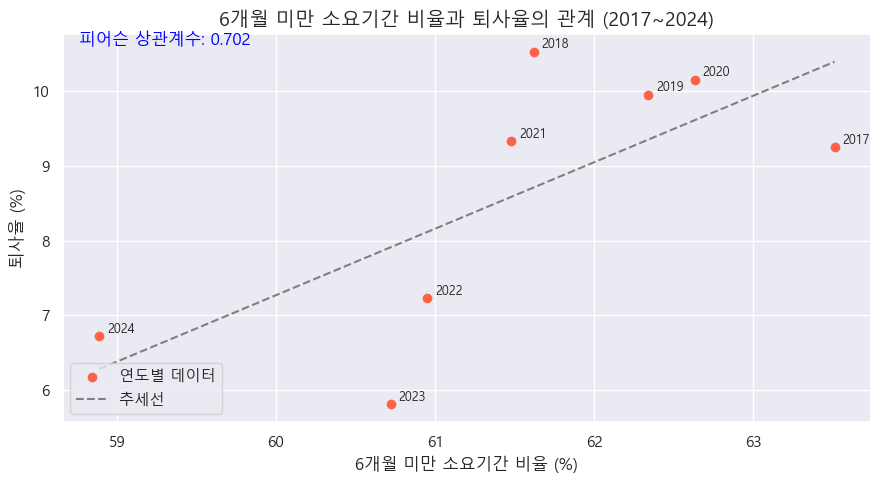

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Í∏∞Ï°¥ Î≥ëÌï©Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÇ¨Ïö©
df_plot = df_corr_6mo.copy()  # ‚Üê 6Í∞úÏõî ÎØ∏Îßå vs Ìá¥ÏÇ¨Ïú® Îç∞Ïù¥ÌÑ∞
df_plot['Ïó∞ÎèÑ'] = df_plot['Ïó∞ÎèÑ'].astype(str)

# x, y Í∞í Ï†ïÏùò
x = df_plot['6Í∞úÏõî ÎØ∏Îßå']
y = df_plot['Ìá¥ÏÇ¨Ïú®']  # ÎòêÎäî Ìá¥ÏÇ¨Ïú® Ïó¥ Ïù¥Î¶Ñ
years = df_plot['Ïó∞ÎèÑ']

# ÌöåÍ∑ÄÏÑ† Í≥ÑÏÇ∞
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line_x = np.linspace(min(x), max(x), 100)
line_y = slope * line_x + intercept

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(9, 5))
plt.scatter(x, y, color='tomato', label='Ïó∞ÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞')  # ÏÇ∞Ï†êÎèÑ
plt.plot(line_x, line_y, color='gray', linestyle='--', label='Ï∂îÏÑ∏ÏÑ†')  # ÌöåÍ∑ÄÏÑ† (Ï†êÏÑ†)

# Í∞Å Ï†êÏóê Ïó∞ÎèÑ ÌÖçÏä§Ìä∏ Ï∂îÍ∞Ä
for i in range(len(df_plot)):
    plt.text(x.iloc[i] + 0.05, y.iloc[i] + 0.05, years.iloc[i], fontsize=9)

# ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌÖçÏä§Ìä∏ (ÏôºÏ™Ω ÏÉÅÎã®)
plt.text(0.02, 0.97, f'ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: {r_value:.3f}', color='blue',
         transform=plt.gca().transAxes, fontsize=12)

# Ï†úÎ™© Î∞è Ï∂ï ÎùºÎ≤®
plt.title("6Í∞úÏõî ÎØ∏Îßå ÏÜåÏöîÍ∏∞Í∞Ñ ÎπÑÏú®Í≥º Ìá¥ÏÇ¨Ïú®Ïùò Í¥ÄÍ≥Ñ (2017~2024)", fontsize=14)
plt.xlabel("6Í∞úÏõî ÎØ∏Îßå ÏÜåÏöîÍ∏∞Í∞Ñ ÎπÑÏú® (%)", fontsize=12)
plt.ylabel("Ìá¥ÏÇ¨Ïú® (%)", fontsize=12)

# Í∏∞ÌÉÄ Ïä§ÌÉÄÏùº
plt.grid(True)
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


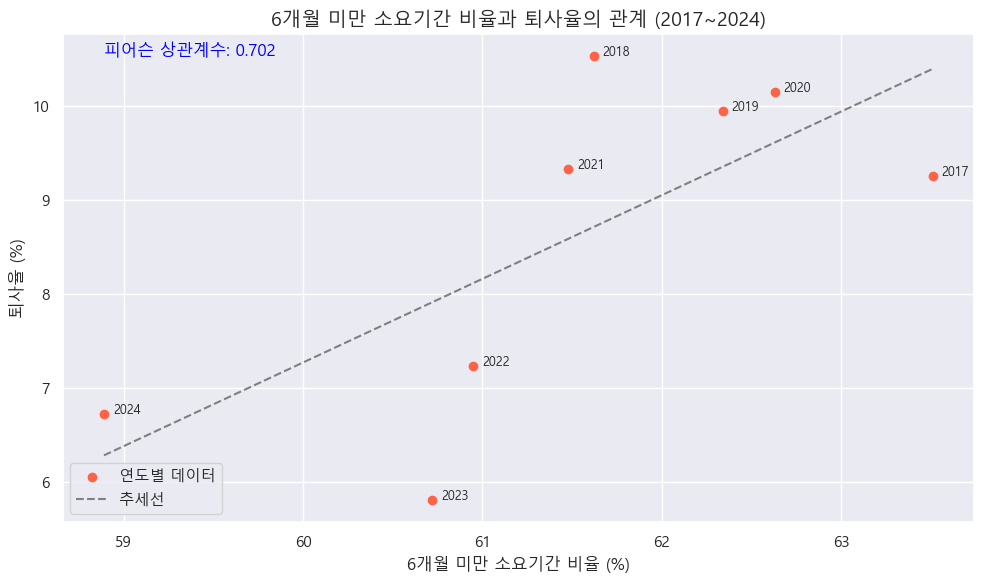

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Ïó∞ÎèÑÎ≥Ñ x, y Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
x = df_corr_6mo['6Í∞úÏõî ÎØ∏Îßå'].values
y = df_corr_6mo['Ìá¥ÏÇ¨Ïú®'].values  # ÎòêÎäî 'Ìá¥ÏÇ¨Ïú®'Î°ú Ïù¥Î¶ÑÏù¥ Î∞îÎÄåÏóàÎã§Î©¥ ÏàòÏ†ï
years = df_corr_6mo['Ïó∞ÎèÑ'].astype(str).values

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Î∞è ÌöåÍ∑ÄÏÑ† Í≥ÑÏÇ∞
slope, intercept, r_value, _, _ = linregress(x, y)
line_x = np.linspace(min(x), max(x), 100)
line_y = slope * line_x + intercept

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='tomato', label='Ïó∞ÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞')

# Ïó∞ÎèÑ ÌÖçÏä§Ìä∏ ÎùºÎ≤® Ï∂îÍ∞Ä
for i in range(len(x)):
    plt.text(x[i] + 0.05, y[i], years[i], fontsize=9)

# Ï∂îÏÑ∏ÏÑ† Ï∂îÍ∞Ä
plt.plot(line_x, line_y, color='gray', linestyle='--', label='Ï∂îÏÑ∏ÏÑ†')

# ÎùºÎ≤® Î∞è Ï†úÎ™©
plt.xlabel('6Í∞úÏõî ÎØ∏Îßå ÏÜåÏöîÍ∏∞Í∞Ñ ÎπÑÏú® (%)', fontsize=12)
plt.ylabel('Ìá¥ÏÇ¨Ïú® (%)', fontsize=12)
plt.title('6Í∞úÏõî ÎØ∏Îßå ÏÜåÏöîÍ∏∞Í∞Ñ ÎπÑÏú®Í≥º Ìá¥ÏÇ¨Ïú®Ïùò Í¥ÄÍ≥Ñ (2017~2024)', fontsize=14)

# ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌÖçÏä§Ìä∏
plt.text(min(x), max(y), f'ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: {r_value:.3f}', fontsize=12, color='blue')

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


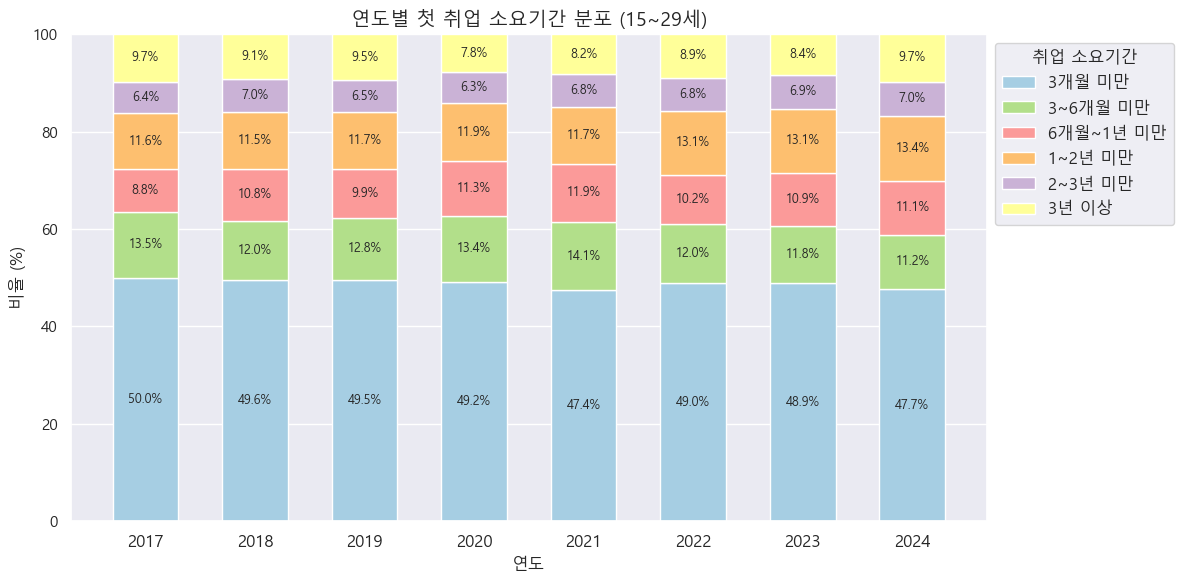

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

# üëâ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ: df_duration_result ÏÇ¨Ïö©
# üëâ Î∂ÑÏÑù ÎåÄÏÉÅ Ïó¥ Ï†ïÏùò
year_col = 'Ïó∞ÎèÑ'
duration_cols = ['3Í∞úÏõî ÎØ∏Îßå', '3~6Í∞úÏõî ÎØ∏Îßå', '6Í∞úÏõî~1ÎÖÑ ÎØ∏Îßå', '1~2ÎÖÑ ÎØ∏Îßå', '2~3ÎÖÑ ÎØ∏Îßå', '3ÎÖÑ Ïù¥ÏÉÅ']

# üëâ Ïó∞ÎèÑ Î∞è ÏÜåÏöîÍ∏∞Í∞Ñ ÎπÑÏú® Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
years = df_duration_result[year_col].astype(str).tolist()
duration_data = df_duration_result[duration_cols]

# üëâ ÏÉâÏÉÅ: ÌååÏä§ÌÖîÌÜ§ 6ÏÉâ
pastel_colors = ['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6', '#ffff99']

# üëâ Í∑∏ÎûòÌîÑ Ï§ÄÎπÑ
x = np.arange(len(years))
bar_width = 0.6
bottom = np.zeros(len(years))

plt.figure(figsize=(12, 6))

for i, col in enumerate(duration_cols):
    values = duration_data[col].values
    plt.bar(x, values, bar_width, bottom=bottom, label=col, color=pastel_colors[i])
    
    # ÌçºÏÑºÌä∏ ÌÖçÏä§Ìä∏ Ï∂îÍ∞Ä
    for j in range(len(x)):
        y_pos = bottom[j] + values[j] / 2
        if values[j] >= 5:
            plt.text(x[j], y_pos, f'{values[j]:.1f}%', ha='center', va='center', fontsize=9)
    
    bottom += values

# üëâ Ìè∞Ìä∏ (ÌïúÍ∏Ä ÎåÄÏùë: Windows ÏÇ¨Ïö©ÏûêÏö©)
font_path = "C:/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

plt.xticks(x, years, fontproperties=fontprop)
plt.xlabel("Ïó∞ÎèÑ", fontproperties=fontprop)
plt.ylabel("ÎπÑÏú® (%)", fontproperties=fontprop)
plt.title("Ïó∞ÎèÑÎ≥Ñ Ï≤´ Ï∑®ÏóÖ ÏÜåÏöîÍ∏∞Í∞Ñ Î∂ÑÌè¨ (15~29ÏÑ∏)", fontproperties=fontprop, fontsize=14)
plt.ylim(0, 100)


plt.legend(title="Ï∑®ÏóÖ ÏÜåÏöîÍ∏∞Í∞Ñ", prop=fontprop, title_fontproperties=fontprop, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


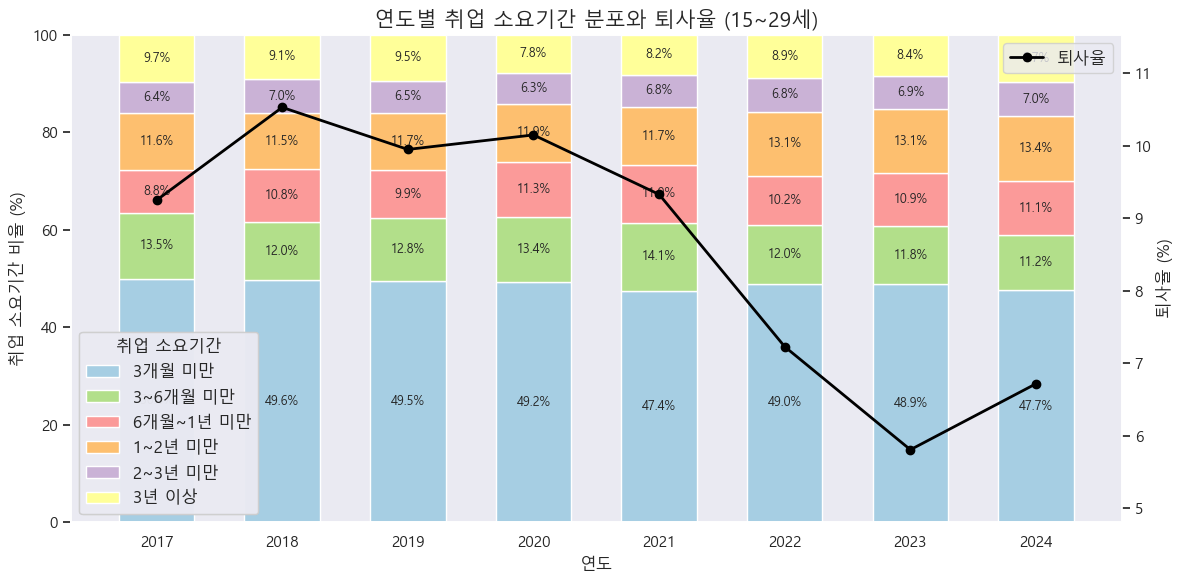

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÏúàÎèÑÏö∞ Í∏∞Ï§Ä)
font_path = "C:/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# ‚úÖ ÏÜåÏöîÍ∏∞Í∞Ñ Ïª¨Îüº Î∞è ÏÉâÏÉÅ
duration_cols = ['3Í∞úÏõî ÎØ∏Îßå', '3~6Í∞úÏõî ÎØ∏Îßå', '6Í∞úÏõî~1ÎÖÑ ÎØ∏Îßå', '1~2ÎÖÑ ÎØ∏Îßå', '2~3ÎÖÑ ÎØ∏Îßå', '3ÎÖÑ Ïù¥ÏÉÅ']
colors = ['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6', '#ffff99']  # ÌååÏä§ÌÖîÌÜ§

# ‚úÖ xÏ∂ï (Ïó∞ÎèÑ)
years = df_duration_result['Ïó∞ÎèÑ'].astype(str).tolist()
x = np.arange(len(years))

# ‚úÖ Ìá¥ÏÇ¨Ïú® Îç∞Ïù¥ÌÑ∞
resign_rate = df_econ_result['Ìá¥ÏÇ¨Ïú®'].values

# ‚úÖ Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
fig, ax1 = plt.subplots(figsize=(12, 6))

# ‚úÖ ÎàÑÏ†Å ÎßâÎåÄÍ∑∏ÎûòÌîÑ
bottom = np.zeros(len(years))
for i, col in enumerate(duration_cols):
    values = df_duration_result[col].values
    bars = ax1.bar(x, values, width=0.6, bottom=bottom, label=col, color=colors[i])
    
    for j in range(len(x)):
        y = bottom[j] + values[j] / 2
        if values[j] >= 5:
            ax1.text(x[j], y, f'{values[j]:.1f}%', ha='center', va='center', fontsize=9)
    
    bottom += values

# ‚úÖ ÏôºÏ™Ω Ï∂ï ÏÑ§Ï†ï
ax1.set_xticks(x)
ax1.set_xticklabels(years)
ax1.set_xlabel("Ïó∞ÎèÑ", fontsize=12)
ax1.set_ylabel("Ï∑®ÏóÖ ÏÜåÏöîÍ∏∞Í∞Ñ ÎπÑÏú® (%)", fontsize=12)
ax1.set_ylim(0, 100)
ax1.set_title("Ïó∞ÎèÑÎ≥Ñ Ï∑®ÏóÖ ÏÜåÏöîÍ∏∞Í∞Ñ Î∂ÑÌè¨ÏôÄ Ìá¥ÏÇ¨Ïú® (15~29ÏÑ∏)", fontsize=15)

# ‚úÖ ÏÑ†Í∑∏ÎûòÌîÑ (Ìá¥ÏÇ¨Ïú®) - Ïö∞Ï∏° yÏ∂ï
ax2 = ax1.twinx()
ax2.plot(x, resign_rate, color='black', marker='o', linewidth=2, label='Ìá¥ÏÇ¨Ïú®')
ax2.set_ylabel("Ìá¥ÏÇ¨Ïú® (%)", fontsize=12)
ax2.set_ylim(min(resign_rate) - 1, max(resign_rate) + 1)


# ‚úÖ Î≤îÎ°Ä: ÏôºÏ™Ω ÏïÑÎûòÎ°ú Ïù¥Îèô
bars_legend = ax1.legend(
    title="Ï∑®ÏóÖ ÏÜåÏöîÍ∏∞Í∞Ñ", 
    loc='lower left', 
    prop=fontprop, 
    title_fontproperties=fontprop
)


# ‚úÖ Í∑∏Î¶¨Îìú Ï†úÍ±∞
ax1.grid(False)
ax2.grid(False)

# ‚úÖ ÏÑ† Í∑∏ÎûòÌîÑ Î≤îÎ°Ä (Ìá¥ÏÇ¨Ïú®): Ïò§Î•∏Ï™Ω ÏúÑ Í∑∏ÎåÄÎ°ú
line_legend = ax2.legend(loc='upper right', prop=fontprop)

# ‚úÖ ÎßâÎåÄ Î≤îÎ°Ä Î∂ôÏù¥Í∏∞
ax1.add_artist(bars_legend)

plt.tight_layout()
plt.show()


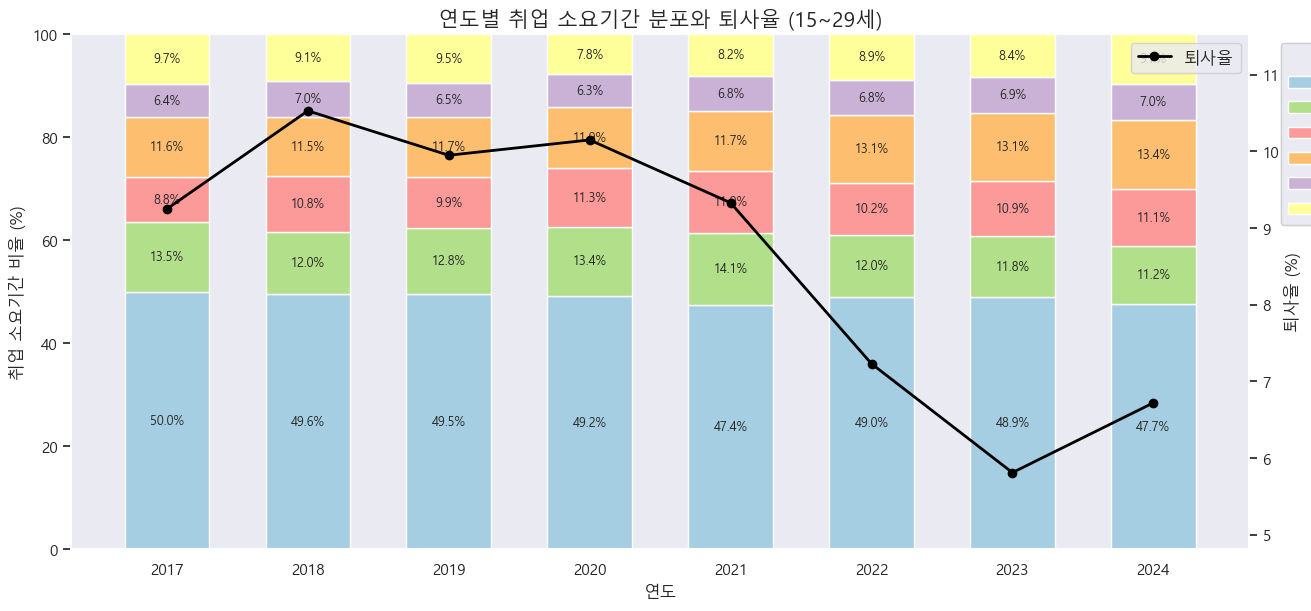

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÏúàÎèÑÏö∞ Í∏∞Ï§Ä)
font_path = "C:/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# ‚úÖ ÏÜåÏöîÍ∏∞Í∞Ñ Ïª¨Îüº Î∞è ÏÉâÏÉÅ
duration_cols = ['3Í∞úÏõî ÎØ∏Îßå', '3~6Í∞úÏõî ÎØ∏Îßå', '6Í∞úÏõî~1ÎÖÑ ÎØ∏Îßå', '1~2ÎÖÑ ÎØ∏Îßå', '2~3ÎÖÑ ÎØ∏Îßå', '3ÎÖÑ Ïù¥ÏÉÅ']
colors = ['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6', '#ffff99']  # ÌååÏä§ÌÖîÌÜ§

# ‚úÖ xÏ∂ï (Ïó∞ÎèÑ)
years = df_duration_result['Ïó∞ÎèÑ'].astype(str).tolist()
x = np.arange(len(years))

# ‚úÖ Ìá¥ÏÇ¨Ïú® Îç∞Ïù¥ÌÑ∞
resign_rate = df_econ_result['Ìá¥ÏÇ¨Ïú®'].values

# ‚úÖ Í∑∏ÎûòÌîÑ ÏÉùÏÑ±: ÏûêÎèô Ïó¨Î∞± ÌôïÎ≥¥Î•º ÏúÑÌïú constrained_layout
fig, ax1 = plt.subplots(figsize=(13, 6), constrained_layout=True)

# ‚úÖ ÎàÑÏ†Å ÎßâÎåÄÍ∑∏ÎûòÌîÑ
bottom = np.zeros(len(years))
for i, col in enumerate(duration_cols):
    values = df_duration_result[col].values
    bars = ax1.bar(x, values, width=0.6, bottom=bottom, label=col, color=colors[i])
    
    for j in range(len(x)):
        y = bottom[j] + values[j] / 2
        if values[j] >= 5:
            ax1.text(x[j], y, f'{values[j]:.1f}%', ha='center', va='center', fontsize=9)
    
    bottom += values

# ‚úÖ ÏôºÏ™Ω Ï∂ï ÏÑ§Ï†ï
ax1.set_xticks(x)
ax1.set_xticklabels(years)
ax1.set_xlabel("Ïó∞ÎèÑ", fontsize=12)
ax1.set_ylabel("Ï∑®ÏóÖ ÏÜåÏöîÍ∏∞Í∞Ñ ÎπÑÏú® (%)", fontsize=12)
ax1.set_ylim(0, 100)
ax1.set_title("Ïó∞ÎèÑÎ≥Ñ Ï∑®ÏóÖ ÏÜåÏöîÍ∏∞Í∞Ñ Î∂ÑÌè¨ÏôÄ Ìá¥ÏÇ¨Ïú® (15~29ÏÑ∏)", fontsize=15)

# ‚úÖ ÏÑ†Í∑∏ÎûòÌîÑ (Ìá¥ÏÇ¨Ïú®) - Ïö∞Ï∏° yÏ∂ï
ax2 = ax1.twinx()
ax2.plot(x, resign_rate, color='black', marker='o', linewidth=2, label='Ìá¥ÏÇ¨Ïú®')
ax2.set_ylabel("Ìá¥ÏÇ¨Ïú® (%)", fontsize=12)
ax2.set_ylim(min(resign_rate) - 1, max(resign_rate) + 1)

# ‚úÖ Î≤îÎ°Ä - ÎßâÎåÄÍ∑∏ÎûòÌîÑ Î≤îÎ°ÄÎ•º Ïò§Î•∏Ï™Ω Î∞îÍπ•Ïóê ÌëúÏãú
bars_legend = ax1.legend(
    title="Ï∑®ÏóÖ ÏÜåÏöîÍ∏∞Í∞Ñ", 
    loc='upper left', 
    bbox_to_anchor=(1.02, 1), 
    prop=fontprop, 
    title_fontproperties=fontprop
)

# ‚úÖ ÏÑ† Î≤îÎ°Ä Ï∂îÍ∞Ä (Ìá¥ÏÇ¨Ïú®)
line_legend = ax2.legend(loc='upper right', prop=fontprop)

# ‚úÖ Í∑∏Î¶¨Îìú Ï†úÍ±∞
ax1.grid(False)
ax2.grid(False)

# ‚úÖ Î≤îÎ°ÄÎ•º Î©îÏù∏ Ï∂ïÏóê Ï∂îÍ∞Ä
ax1.add_artist(bars_legend)

plt.show()
